In [1]:
import torch
import torchviz
from torchviz import make_dot, make_dot_from_trace

In [2]:
a = torch.ones(3)
a.requires_grad = True
b = 2*a

In [3]:
b.retain_grad()

In [4]:
c = b.mean()

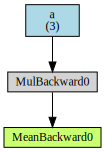

In [5]:
make_dot(c, {'a':a, 'b':b})

In [6]:
d = torch.ones(3)

In [7]:
d.requires_grad = True

In [8]:
e = d*2

In [9]:
e.retain_grad()

In [10]:
e.register_hook(lambda x:print(x))

In [11]:
f = e.mean()

In [12]:
c.backward()

In [13]:
f.backward()

tensor([0.3333, 0.3333, 0.3333])


In [21]:
print(c.grad_fn)

In [14]:
print(a.grad, b.grad)
print(d.grad, e.grad)

tensor([0.6667, 0.6667, 0.6667]) tensor([0.3333, 0.3333, 0.3333])
tensor([0.6667, 0.6667, 0.6667]) tensor([0.3333, 0.3333, 0.3333])


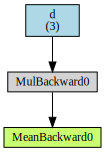

In [15]:
make_dot(f, {'d':d, 'e':e})

In [16]:
print(f)

tensor(2., grad_fn=<MeanBackward0>)


In [17]:
b.grad *= 2
e.grad *= 2

In [18]:
print(a.grad, b.grad)
print(d.grad, e.grad)

tensor([0.6667, 0.6667, 0.6667]) tensor([0.6667, 0.6667, 0.6667])
tensor([0.6667, 0.6667, 0.6667]) tensor([0.6667, 0.6667, 0.6667])


In [19]:
print(a, b, c)
print(d, e, f)

tensor([1., 1., 1.], requires_grad=True) tensor([2., 2., 2.], grad_fn=<MulBackward0>) tensor(2., grad_fn=<MeanBackward0>)
tensor([1., 1., 1.], requires_grad=True) tensor([2., 2., 2.], grad_fn=<MulBackward0>) tensor(2., grad_fn=<MeanBackward0>)
